## IMPORTING LIBRARIES

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [94]:
#To find number of rows and columns of a given DataFrame
df.shape

(32648, 8)

In [95]:
#computes and displays summary statistics for a Python dataframe
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [96]:
#It prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [97]:
#It returns the number of missing values in each column
df.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

# NO NULL VALUES IN OUR DATASET

#### Since first column is same as Last column, We can drop first column

In [98]:
df.drop('bike_name',axis=1,inplace=True)

In [99]:
df_new  = df.copy()

In [100]:
df.brand.value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
Name: brand, dtype: int64

## REPLACING ALL THE BRANDS HAVING VALUE COUNTS LESS THAN 1000 TO 'OTHERS'

In [101]:
x = df_new['brand'].value_counts().loc[lambda x: x < 1000]

In [102]:
df_new['brand'].replace(x.keys(),'Others',inplace=True)

In [103]:
df_new.brand.value_counts()

Bajaj            11213
Hero              6368
Royal Enfield     4178
Yamaha            3916
Honda             2108
Suzuki            1464
TVS               1247
Others            1077
KTM               1077
Name: brand, dtype: int64

# ANALYSING CITY COLUMN

In [104]:
df_new['city'].value_counts()

Delhi            7318
Bangalore        2723
Mumbai           2591
Hyderabad        2160
Pune             1724
                 ... 
Surendranagar       1
Khandela            1
Mohammadabad        1
Shimla              1
Sidhi               1
Name: city, Length: 443, dtype: int64

## REPLACING ALL THE CITIES HAVING VALUE COUNTS LESS THAN 500 TO 'OTHERS'

In [105]:
x = df_new['city'].value_counts().loc[lambda x: x < 500]

In [106]:
df_new['city'].replace(x.keys(),'Others',inplace=True)

In [107]:
df_new.city.value_counts()

Delhi                  7318
Bangalore              2723
Mumbai                 2591
Hyderabad              2160
Others                 2098
Pune                   1724
Chennai                1619
Lucknow                1294
Jaipur                 1007
Ghaziabad               938
Ahmedabad               905
Noida                   776
Bhopal                  651
Gautam Buddha Nagar     649
Kanchipuram             640
Jodhpur                 635
Karnal                  625
Allahabad               621
Rupnagar                621
Gurgaon                 617
Godhara                 611
Faridabad               609
Kadapa                  608
Perumbavoor             608
Name: city, dtype: int64

In [108]:
df_new['owner'].value_counts()

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

### REPLACING ALL THE SECOND, THIRD, FOURTH AND MORE OWNERS TO 'SECOND OWNER OR MORE'

In [109]:
df_new['owner'].replace(['Second Owner','Third Owner','Fourth Owner Or More'],'Second Owner or more',inplace=True)
df_new['owner'].value_counts()

First Owner             29964
Second Owner or more     2684
Name: owner, dtype: int64

# TREATING OUTLIERS

In [110]:
len(df_new[df_new['price'] > df_new['price'].quantile(0.99)])

177

In [111]:
len(df_new[df_new['power'] > df_new['power'].quantile(0.99)])

131

In [112]:
len(df_new[df_new['kms_driven'] > df_new['kms_driven'].quantile(0.99)])

127

In [113]:
len(df_new[df_new['age'] > df_new['age'].quantile(0.99)])

46

### Since the no. of datapoints above 99% quantile is few in number, therefore we can drop them

In [114]:
df_new = df_new[-(df_new.price > df_new.price.quantile(0.99))]

In [115]:
df_new = df_new[-(df_new.power > df_new.power.quantile(0.99))]

In [116]:
df_new = df_new[-(df_new.kms_driven > df_new.kms_driven.quantile(0.99))]

In [117]:
df_new = df_new[-(df_new.age > df_new.age.quantile(0.99))]

In [118]:
print('therefore total number of dropped rows is : ',len(df) - len(df_new))

therefore total number of dropped rows is :  356


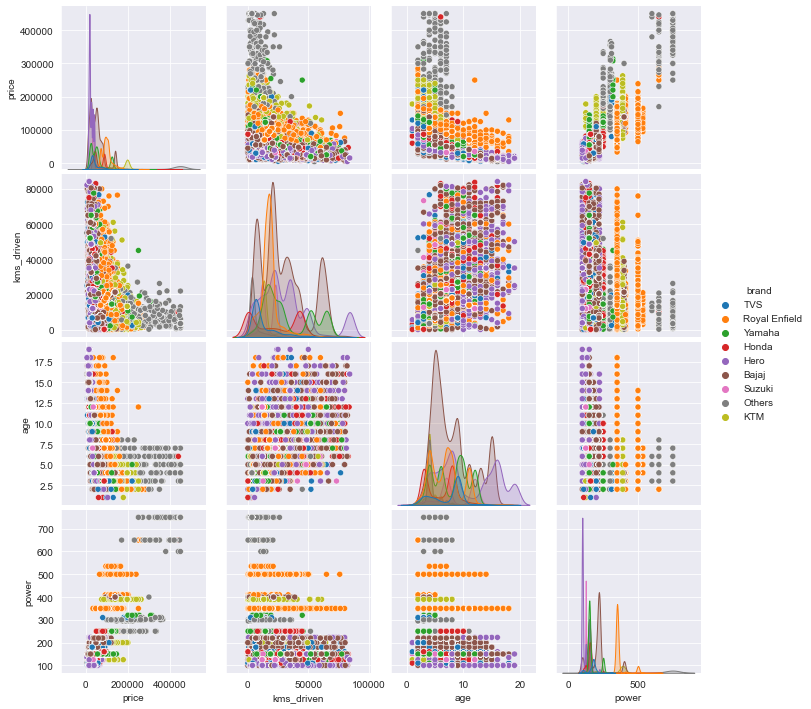

In [119]:
#visualizations plot pairwise relationships in a dataset so that each variable in a dataset will be plotted against each other variable in the dataset.
sns.pairplot(df_new,hue='brand')

#### From the Pairplot we can conclude that there is some positive relation between price and power , and a negative relationship between price and age, and price and kms_driven

In [120]:
#It Set the parameters that control the general style of the plots
sns.set_style('darkgrid')

<AxesSubplot:>

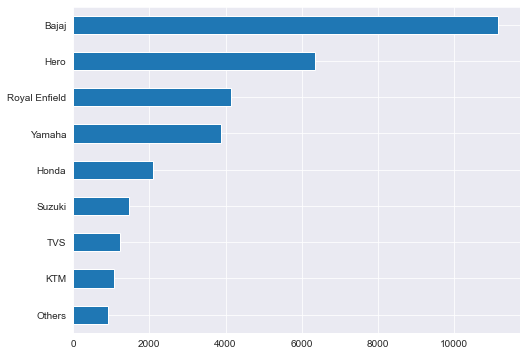

In [121]:
plt.figure(figsize=(8,6))
df_new['brand'].value_counts().sort_values().plot(kind="barh")

<AxesSubplot:ylabel='brand'>

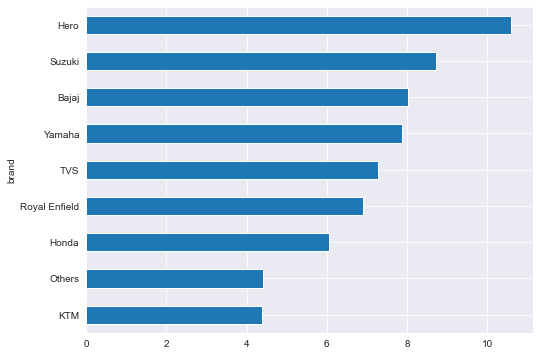

In [122]:
plt.figure(figsize=(8,6))
df_new.groupby('brand')['age'].mean().sort_values().plot(kind="barh")

<AxesSubplot:ylabel='brand'>

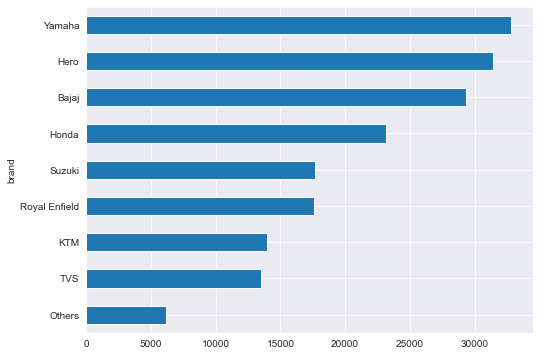

In [123]:
plt.figure(figsize=(8,6))
df_new.groupby('brand')['kms_driven'].mean().sort_values().plot(kind="barh")

<AxesSubplot:ylabel='brand'>

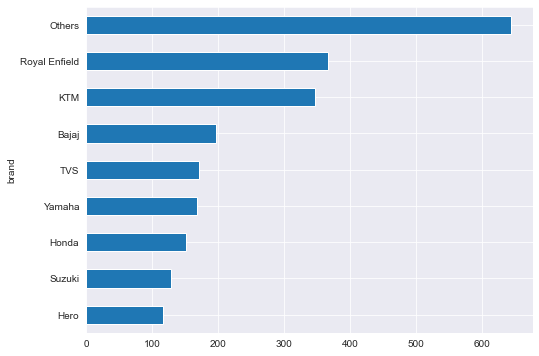

In [124]:
plt.figure(figsize=(8,6))
df_new.groupby('brand')['power'].mean().sort_values().plot(kind="barh")

<AxesSubplot:>

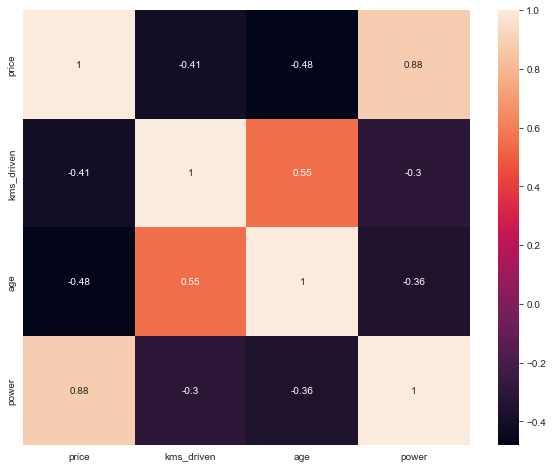

In [125]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True)